# Script para Automatizar la tarea de preparación de datos financieros
# Johana Patricia Pineda de Zamora
# dataset:credit_card_default.csv

# Pasos del procedimiento para automatizarlo
1. Carga el archivo .csv 
2. Realiza limpieza: valores nulos, duplicados, codificación
3. Crea nuevas variables derivadas
4. Estandariza columnas clave
5. Guarda un nuevo dataset limpio
6. Imprime un resumen y genera visualizaciones básicas

In [2]:
!pip install seaborn

Datos cargados correctamente. 30000 filas y 25 columnas.


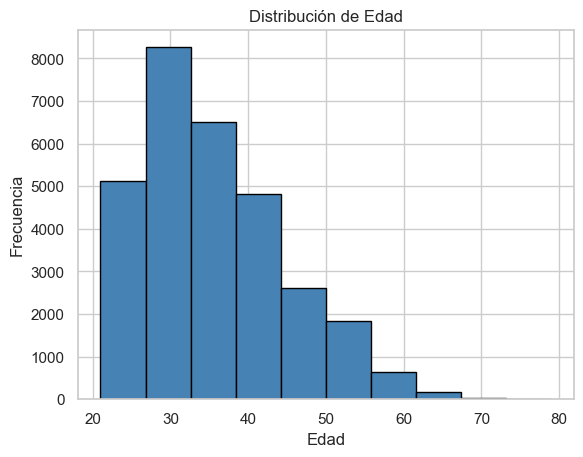

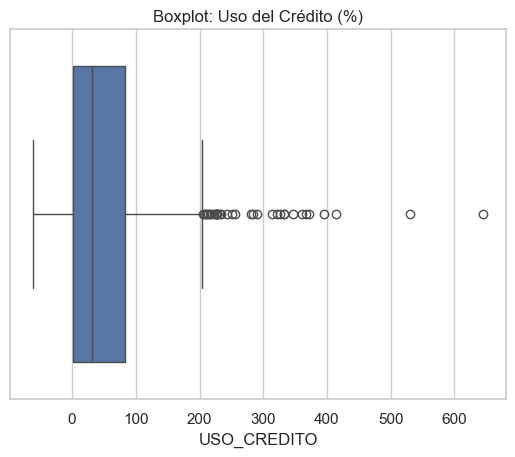

Dataset limpio guardado en: dataset_limpio2.csv


In [1]:
# preparar_datos_financieros

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def cargar_datos(ruta):
    """Carga el archivo CSV de entrada."""
    try:
        df = pd.read_csv("credit_card_default.csv")
        print(f"Datos cargados correctamente. {df.shape[0]} filas y {df.shape[1]} columnas.")
        return df
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return None

def limpiar_datos(df):
    """Limpieza básica del dataset."""
    df = df.copy()
    df.drop_duplicates(inplace=True)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

    # Corrección de categorías inválidas (si existen)
    if "EDUCATION" in df.columns:
        df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})
    if "MARRIAGE" in df.columns:
        df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})
    return df

def transformar_datos(df):
    """Transformaciones y variables nuevas."""
    if "BILL_AMT1" in df.columns and "LIMIT_BAL" in df.columns:
        df["USO_CREDITO"] = (df["BILL_AMT1"] / df["LIMIT_BAL"]) * 100
    if "PAY_AMT1" in df.columns and "BILL_AMT1" in df.columns:
        df["PAGO_RATIO"] = df["PAY_AMT1"] / (df["BILL_AMT1"] + 1)
    if "SEX" in df.columns:
        df["GENERO"] = df["SEX"].map({1: "Masculino", 2: "Femenino"})
    return df

def guardar_datos(df, ruta_salida):
    """Exportar a nuevo CSV limpio"""
    df.to_csv(ruta_salida, index=False)
    print(f"Dataset limpio guardado en: {ruta_salida}")

def visualizar_datos(df):
    """Visualización básica"""
    sns.set(style="whitegrid")
    if "AGE" in df.columns:
        plt.hist(df["AGE"], bins=10, color='steelblue', edgecolor='black')
        plt.title("Distribución de Edad")
        plt.xlabel("Edad")
        plt.ylabel("Frecuencia")
        plt.show()
    if "USO_CREDITO" in df.columns:
        sns.boxplot(x=df["USO_CREDITO"])
        plt.title("Boxplot: Uso del Crédito (%)")
        plt.show()
    if "DEFAULT" in df.columns:
        sns.countplot(data=df, x="DEFAULT", palette="Set2")
        plt.title("Clientes en Default (0 = No, 1 = Sí)")
        plt.show()

def main():
    archivo_entrada = "credit_card_default.csv"  # Ruta original
    archivo_salida = "dataset_limpio2.csv"        # Salida final

    if not os.path.exists(archivo_entrada):
        print(f"El archivo '{archivo_entrada}' no existe.")
        return

    df = cargar_datos("credit_card_default.csv")
    if df is not None:
        df = limpiar_datos(df)
        df = transformar_datos(df)
        visualizar_datos(df)
        guardar_datos(df, archivo_salida)

if __name__ == "__main__":
    main()

Archivos esperados:
* Entrada: credit_card_default.csv
* Salida: dataset_limpio2.csv

In [3]:
!preparar_datos_financieros.py.ipynb